In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('../assests/scaled_voice_data.csv')
x = df.drop('gender', axis=1)
y = df['gender']

In [16]:
for i in range(4,13,2):
    pca = PCA(n_components=i)
    pca.fit(x)
    pca_df = pca.transform(x)
    
    L = []

    for k in range(1, len(pca_df[0])+1):
        L.append("PCA"+str(k))
    pca_df = pd.DataFrame(pca_df, columns=L)
    
    X_trainpca, X_testpca , Y_trainpca, Y_testpca = train_test_split(pca_df, y, test_size=0.2, random_state=20)

    lr_pca = LogisticRegression(penalty='l2', max_iter=500)
    lr_pca.fit(X_trainpca, Y_trainpca)
    y_pca_pred =lr_pca.predict(X_testpca)

    print()
    print("Number of Components: " + str(i))
    print(f"GaussianNB with PCA variance {i/100}%")
    print("Accuracy with PCA", metrics.accuracy_score(Y_testpca, y_pca_pred))
    print("Precision with PCA", metrics.precision_score(Y_testpca, y_pca_pred, average = 'macro'))
    print("Recall with PCA", metrics.recall_score(Y_testpca, y_pca_pred, average = 'macro'))
    print("F1 score with PCA", metrics.f1_score(Y_testpca, y_pca_pred, average = 'macro') )


Number of Components: 4
GaussianNB with PCA variance 0.04%
Accuracy with PCA 0.8422712933753943
Precision with PCA 0.8476450098440103
Recall with PCA 0.8426630840423943
F1 score with PCA 0.8417610941945789

Number of Components: 6
GaussianNB with PCA variance 0.06%
Accuracy with PCA 0.9668769716088328
Precision with PCA 0.9669433827042523
Recall with PCA 0.9668457978802807
F1 score with PCA 0.9668729332905374

Number of Components: 8
GaussianNB with PCA variance 0.08%
Accuracy with PCA 0.9684542586750788
Precision with PCA 0.9684890468085954
Recall with PCA 0.9684330994675823
F1 score with PCA 0.9684514331210191

Number of Components: 10
GaussianNB with PCA variance 0.1%
Accuracy with PCA 0.9716088328075709
Precision with PCA 0.9717181169303057
Recall with PCA 0.9715678957058267
F1 score with PCA 0.9716043116061032

Number of Components: 12
GaussianNB with PCA variance 0.12%
Accuracy with PCA 0.9684542586750788
Precision with PCA 0.9684890468085954
Recall with PCA 0.9684330994675823
F

### PCA for 10 components

In [20]:
pca = decomposition.PCA(n_components=10)
pc = pca.fit_transform(x)
pc_columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10']
pc_df = pd.DataFrame(data = pc , columns = pc_columns)
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.391319,-1.201480,-0.144387,0.087451,-0.339878,-0.770705,0.325513,0.068958,0.169749,-0.252772
1,4.918264,0.161819,0.260921,-0.173135,0.152522,-0.190551,0.892711,-0.999541,0.357837,-0.025498
2,-0.979373,-1.681827,-0.129950,0.197744,-0.618196,0.917564,0.156921,0.814881,0.030497,0.241747
3,-2.048714,0.766881,-0.201251,0.143089,-0.243193,0.112856,0.233817,0.355381,0.025467,-0.133834
4,-2.479937,0.205079,0.010633,0.099488,-0.150123,0.022672,0.190088,0.324685,0.091452,0.085824


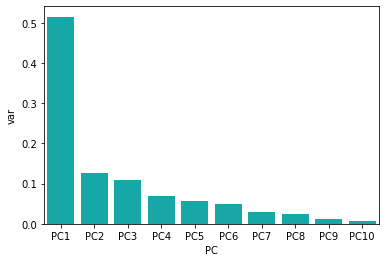

In [21]:
pcdf = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':pc_columns})
sns.barplot(x='PC',y="var", data=pcdf, color="c");